<a href="https://colab.research.google.com/github/osmgg2/Egypt-Stock-Market-Prices-Predictor/blob/main/Egyptian_Stock_Predictor_LSTM_Modl_By_Osama_Geris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
stemosamaghandour_egx_jan_2025_path = kagglehub.dataset_download('stemosamaghandour/egx-jan-2025')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/egx-jan-2025/egx_jan_2025.xlsx


It’s a tree-based technique for predicting stock prices. We will check out how to predict the stock market using LSTM.

Machine learning algorithms like regression and support vector machines aid in stock market forecasting.
Random Forest is a useful technique for predicting stock prices.
LSTM (Long Short-Term Memory) is a powerful method for stock market prediction.
By using Python and AI, we can make accurate predictions and optimize trading.

![image.png](attachment:b21ec255-854b-4fad-aa74-66e9f6866715.png)

In [ ]:
!pip install openpyxl

In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = '/kaggle/input/egx-jan-2025/egx_jan_2025.xlsx'
data = pd.read_excel(file_path)
data.shape
data.head()
data.columns

Index(['Stock', 'Sector', 'Currenc y', 'Par Value', 'Shares', 'Paid Capital',
       'Open Price', 'Highest Price', 'Highest Price Date', 'Lowest Price',
       'Lowest Price Date', 'Close Price', 'YTD\nPrice Chg.\n%',
       'Open Price after avoiding Capital Structure change effect',
       'YTD Price Chg. % after avoiding Capital Structure change effect',
       'Market Capitalization',
       'Average daily value traded in EGP (No\nDeals)',
       'Average daily volume traded (No Deals)',
       'Average daily No. of Trades (No Deals)', 'Tradin g Days',
       'Last Annual Profit', 'Profit Date', 'P/E', 'MIN\nP/E', 'MAX\nP/E',
       'Sector P/E', 'Coupon', 'Payment Date', 'DY', 'Corporate Actions',
       'Index'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0301 - val_loss: nan
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0343 - val_loss: nan
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0224 - val_loss: nan
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0224 - val_loss: nan
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0202 - val_loss: nan
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0197 - val_loss: nan
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0233 - val_loss: nan
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0215 - val_loss: nan
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0161 - val_loss: nan
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0301 - val_loss: nan
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0234 - val_loss: nan
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0214 - val_loss: nan
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━

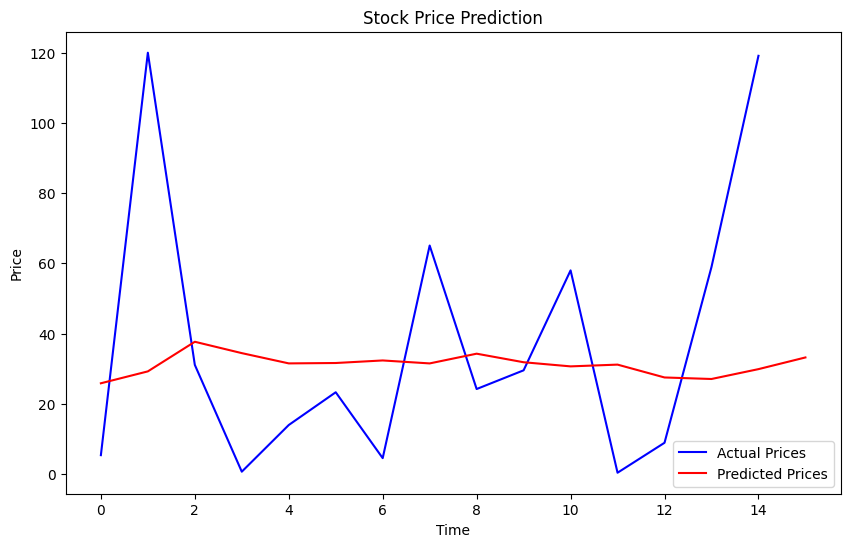

In [ ]:


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Ensure the dataset has 'Date' and 'Close' columns
data['Highest Price Date'] = pd.to_datetime(data['Highest Price Date'])
data = data.sort_values('Highest Price Date')
close_prices = data['Close Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences
n_timesteps = 60  # Number of days to look back
n_features = 1    # Only 'Close' price

X, y = [], []
for i in range(n_timesteps, len(scaled_data)):
    X.append(scaled_data[i - n_timesteps:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(actual, color='blue', label='Actual Prices')
plt.plot(predicted, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
